In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import re
from tqdm import tqdm  # Progress bar
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import os

In [3]:
df = pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [4]:
df['Category'][0]

'Data Science'

In [5]:
category = df['Category'].value_counts().reset_index()
category

,Category,count
0,Java Developer,84
1,Testing,70
2,DevOps Engineer,55
3,Python Developer,48
4,Web Designing,45
5,HR,44
6,Hadoop,42
7,Blockchain,40
8,ETL Developer,40
9,Operations Manager,40


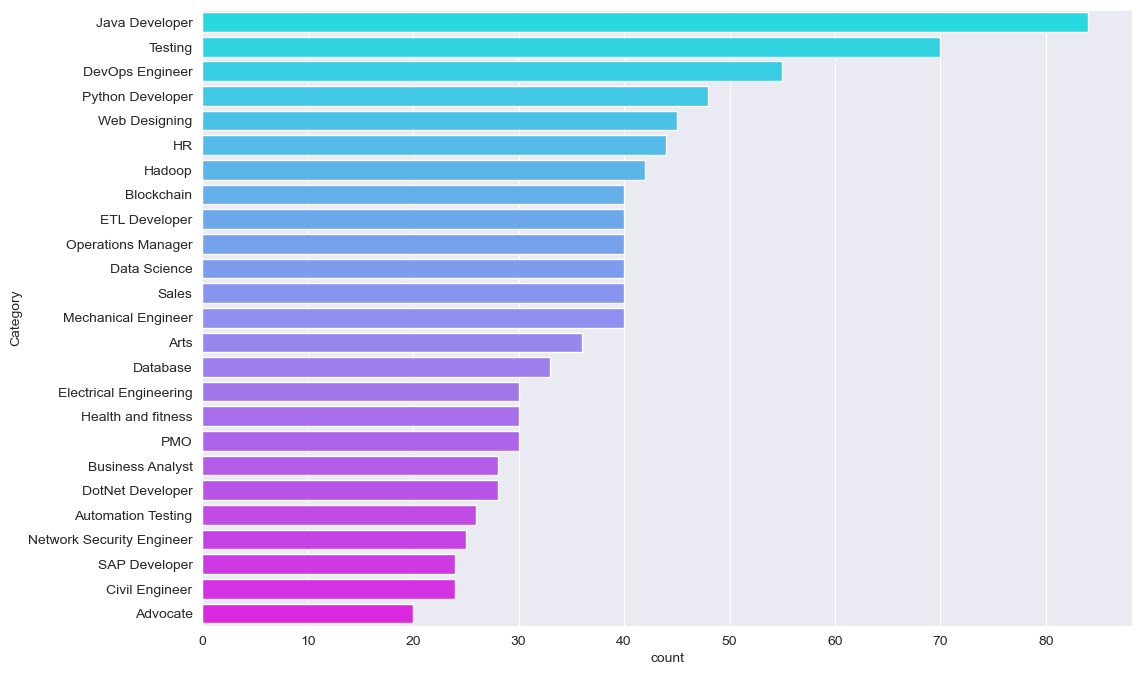

In [6]:
plt.figure(figsize=(12,8))
sns.barplot(x=category['count'],y=category['Category'], palette='cool')
plt.show()

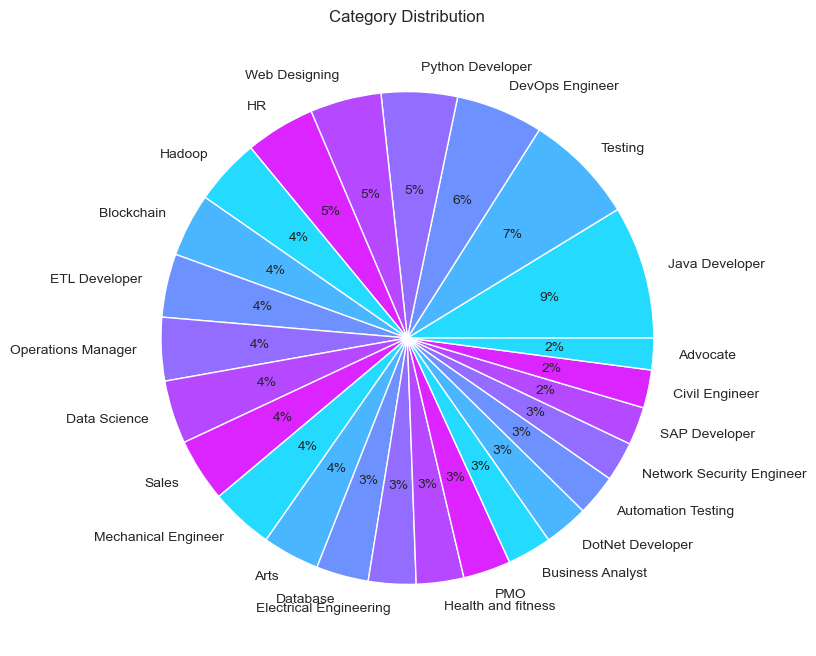

In [7]:
plt.figure(figsize=(12,8))
plt.pie(category['count'], labels=category['Category'],
        colors=sns.color_palette('cool'), autopct='%.0f%%')
plt.title('Category Distribution')
plt.show()

In [8]:
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', '', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', '  ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText

In [9]:
df['cleaned'] = df['Resume'].apply(lambda x:cleanResume(x))
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [10]:
label = LabelEncoder()
df['Category'] = label.fit_transform(df['Category'])
df.head()

,Category,Resume,cleaned
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [11]:
text = df['cleaned'].values
target = df['Category'].values
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    stop_words='english',
    max_features=1500)
word_vectorizer.fit(text)
WordFeatures = word_vectorizer.transform(text)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=24, test_size=0.2)

In [13]:
model = OneVsRestClassifier(KNeighborsClassifier())
model.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [14]:
y_pred = model.predict(X_test)

In [15]:
#print(f'---------------------------------\n| Training Accuracy   :- {(model.score(X_train, y_train)*100).round(2)}% |')
#print(f'---------------------------------\n| Validation Accuracy :- {(model.score(X_test, y_test)*100).round(2)}% |\n---------------------------------')

In [86]:
import PyPDF2
from io import StringIO
import pandas as pd
from tika import parser    
import re


def pdf_to_text(file_path):
    file_data = parser.from_file(file_path)
    text = file_data['content']
    return text

resume_files = [
    "Resumes/Nilesh.pdf",
    "Resumes/Debayan.pdf",
    "Resumes/Arghya.pdf"
]

resumes_data = []

for file_path in resume_files:
    text = cleanResume(pdf_to_text(file_path))
    resumes_data.append({'ResumeText': text, 'FileName': file_path})

resumes_df = pd.DataFrame(resumes_data)

resumes_features = word_vectorizer.transform(resumes_df['ResumeText'])

predicted_probs = model.predict_proba(resumes_features)

for i, category in enumerate(label.classes_):
    resumes_df[category] = predicted_probs[:, i]

for category in label.classes_:
    print(f"\nRANKS for {category}")
    print("-----")
    resumes_df_sorted = resumes_df.sort_values(by=category, ascending=False)
    for rank, (idx, row) in enumerate(resumes_df_sorted.iterrows()):
        file_name = row['FileName']
        print(f"Rank {rank + 1} - Resume {file_name}")

AttributeError: 'Sequential' object has no attribute 'predict_proba'

# TRAINING

In [57]:
import re
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping

def cleanResume(resumeText):
    resumeText = re.sub(r'http\S+\s*', ' ', resumeText)
    resumeText = re.sub(r'RT|cc', ' ', resumeText)
    resumeText = re.sub(r'#\S+', '', resumeText)
    resumeText = re.sub(r'@\S+', ' ', resumeText)
    resumeText = re.sub(r'[%s]' % re.escape("!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)
    resumeText = re.sub(r'\s+', ' ', resumeText).strip()
    return resumeText

def create_deeprank_model(vocab_size, num_classes, max_sequence_length):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length),
        Conv1D(filters=128, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        LSTM(64),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def main():
    df = pd.read_csv('UpdatedResumeDataSet.csv')
    df['cleaned'] = df['Resume'].apply(cleanResume)

    text = df['cleaned'].values
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(text)
    vocab_size = len(tokenizer.word_index) + 1
    num_classes = df['Category'].nunique()

    label_encoder = LabelEncoder()
    df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])

    tokenized_text = tokenizer.texts_to_sequences(text)
    max_sequence_length = 500
    padded_text = pad_sequences(tokenized_text, maxlen=max_sequence_length)

    X_train, X_val, y_train, y_val = train_test_split(
        padded_text, df['Category_Encoded'], test_size=0.2, random_state=42
    )
    y_train_encoded = to_categorical(y_train, num_classes=num_classes)
    y_val_encoded = to_categorical(y_val, num_classes=num_classes)

    model = create_deeprank_model(vocab_size, num_classes, max_sequence_length)
    early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
    
    model.fit(
        X_train, y_train_encoded, 
        validation_data=(X_val, y_val_encoded), 
        epochs=10, batch_size=64, 
        callbacks=[early_stopping]
    )
    
    model.save_weights('deeprank_model.h5')

if __name__ == '__main__':
    main()


Epoch 1/10
13/13 [==============================] - 5s 277ms/step - loss: 3.1790 - accuracy: 0.0897 - val_loss: 3.1205 - val_accuracy: 0.0829
Epoch 2/10
13/13 [==============================] - 2s 174ms/step - loss: 3.0352 - accuracy: 0.1508 - val_loss: 2.9329 - val_accuracy: 0.1451
Epoch 3/10
13/13 [==============================] - 2s 170ms/step - loss: 2.6600 - accuracy: 0.2757 - val_loss: 2.4431 - val_accuracy: 0.4041
Epoch 4/10
13/13 [==============================] - 2s 144ms/step - loss: 2.4102 - accuracy: 0.4356 - val_loss: 2.1809 - val_accuracy: 0.6218
Epoch 5/10
13/13 [==============================] - 2s 174ms/step - loss: 1.9271 - accuracy: 0.5917 - val_loss: 1.7331 - val_accuracy: 0.6684
Epoch 6/10
13/13 [==============================] - 3s 230ms/step - loss: 1.6052 - accuracy: 0.6476 - val_loss: 1.3733 - val_accuracy: 0.7772
Epoch 7/10
13/13 [==============================] - 2s 182ms/step - loss: 1.1830 - accuracy: 0.8049 - val_loss: 0.9813 - val_accuracy: 0.8912
Epoch 

# INFERENCE CODE

In [69]:
import numpy as np
import pandas as pd
import re
import glob
import PyPDF2
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [70]:
def cleanResume(resumeText):
    resumeText = re.sub(r'http\S+\s*', ' ', resumeText)
    resumeText = re.sub(r'RT|cc', ' ', resumeText)
    resumeText = re.sub(r'#\S+', '', resumeText)
    resumeText = re.sub(r'@\S+', ' ', resumeText)
    resumeText = re.sub(r'[%s]' % re.escape("!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"), ' ', resumeText)
    resumeText = re.sub(r'[^\x00-\x7f]', r' ', resumeText)
    resumeText = re.sub(r'\s+', ' ', resumeText).strip()
    return resumeText

df = pd.read_csv('UpdatedResumeDataSet.csv')
df['cleaned'] = df['Resume'].apply(cleanResume)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['cleaned'].values)
vocab_size = len(tokenizer.word_index) + 1
num_classes = df['Category'].nunique()

label_encoder = LabelEncoder()
df['Category_Encoded'] = label_encoder.fit_transform(df['Category'])
category_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))

max_sequence_length = 500

def create_deeprank_model(vocab_size, num_classes, max_sequence_length):
    model = Sequential([
        Embedding(input_dim=vocab_size, output_dim=128, input_length=max_sequence_length),
        Conv1D(filters=128, kernel_size=5, activation='relu'),
        MaxPooling1D(pool_size=2),
        LSTM(64),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model = create_deeprank_model(vocab_size, num_classes, max_sequence_length)
model.load_weights('deeprank_model.h5')

def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text() + " "
    return text.strip()

def predict_resume_category_probabilities(resume_text):
    cleaned_text = cleanResume(resume_text)
    tokenized_text = tokenizer.texts_to_sequences([cleaned_text])
    padded_text = pad_sequences(tokenized_text, maxlen=max_sequence_length)
    prediction = model.predict(padded_text)[0]
    return prediction

def process_resumes(pdf_folder, job_role):
    if job_role not in category_mapping:
        raise ValueError(f"Job role '{job_role}' not found in category mapping.")
    
    job_role_index = category_mapping[job_role]
    pdf_files = glob.glob(f"{pdf_folder}/*.pdf")
    resume_data = []

    for pdf in pdf_files:
        resume_text = extract_text_from_pdf(pdf)
        probabilities = predict_resume_category_probabilities(resume_text)
        job_role_score = probabilities[job_role_index]
        resume_data.append((pdf, job_role_score))
    
    df_resumes = pd.DataFrame(resume_data, columns=['Resume', 'Job Role Score'])
    scaler = MinMaxScaler()
    df_resumes['Normalized Score'] = scaler.fit_transform(df_resumes[['Job Role Score']])
    df_resumes = df_resumes.sort_values(by='Normalized Score', ascending=False).reset_index(drop=True)
    
    return df_resumes


In [78]:
set(df['Category'])

{'Advocate',
 'Arts',
 'Automation Testing',
 'Blockchain',
 'Business Analyst',
 'Civil Engineer',
 'Data Science',
 'Database',
 'DevOps Engineer',
 'DotNet Developer',
 'ETL Developer',
 'Electrical Engineering',
 'HR',
 'Hadoop',
 'Health and fitness',
 'Java Developer',
 'Mechanical Engineer',
 'Network Security Engineer',
 'Operations Manager',
 'PMO',
 'Python Developer',
 'SAP Developer',
 'Sales',
 'Testing',
 'Web Designing'}

# RANKING

In [84]:
pdf_folder = "Resumes"
job_role = input("Give Job Role")
print("Job Role : ",job_role)
ranked_resumes = process_resumes(pdf_folder, job_role)
print(ranked_resumes)

Job Role :  Database
1/1 [==============================] - 0s 24ms/step
                  Resume  Job Role Score  Normalized Score
0    Resumes/Debayan.pdf        0.091521          1.000000
1     Resumes/Nilesh.pdf        0.020414          0.133169
2  Resumes/Debarghya.pdf        0.011157          0.020323
3     Resumes/Arghya.pdf        0.009490          0.000000
